In [43]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [26]:
## reading CSV file and saving into variable

df = pd.read_csv(r"C:\Users\nithi\Downloads\london_weather.csv")

In [27]:
## displaying first few lines of dataset

df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [28]:
# checking the number of rows and columns of the dataset

df.shape

(15341, 10)

In [29]:
## displaying descriptive statistics of the dataset

df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [30]:
## checking the datatypes and non-null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [31]:
## displaying null values present in every column

df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [32]:
## converting date column to date format and extracting year, month and day from the date

df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['Year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

In [33]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year,month,day
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1,2
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1,3
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1,4
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1,5


In [34]:
## assigning month names to month and dropping the date column

data = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12], \
'month_name' : ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
month_name = pd.DataFrame(data)
df = df.merge(month_name, on = 'month', how='left')
df = df.drop('date', axis=1)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year,month,day,month_name
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1,1,January
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1,2,January
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1,3,January
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1,4,January
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1,5,January


In [11]:
df.isnull().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
Year                   0
month                  0
day                    0
month_name             0
dtype: int64

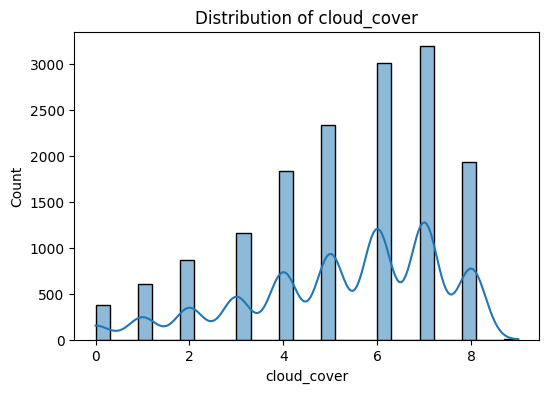

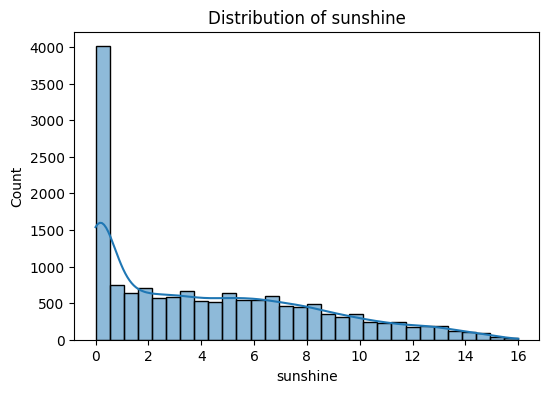

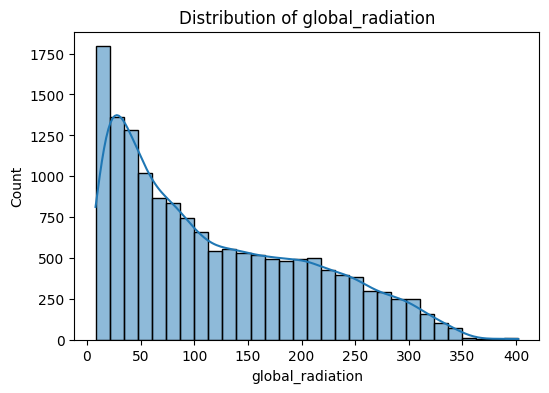

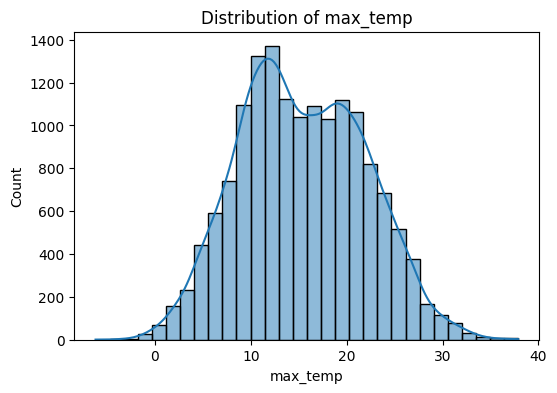

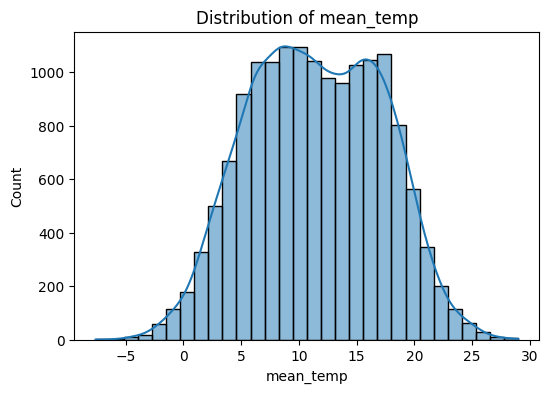

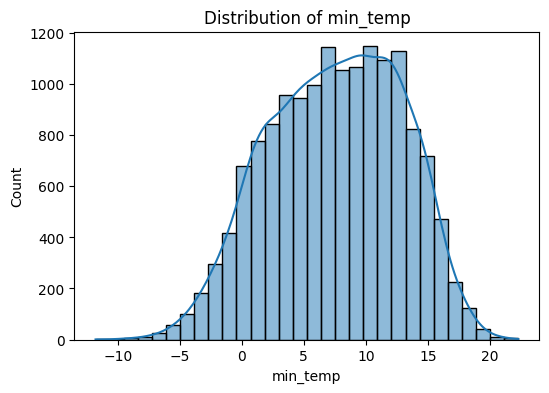

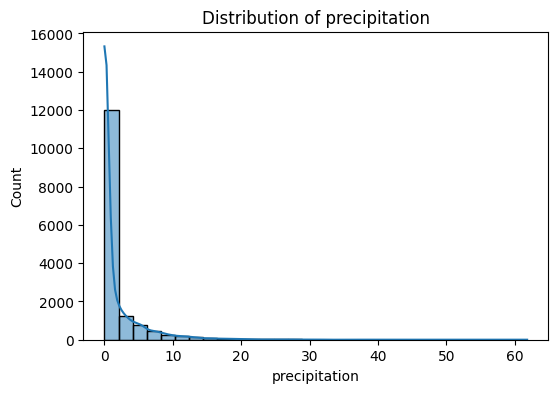

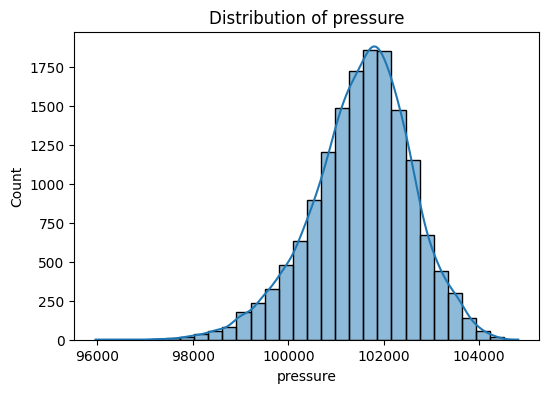

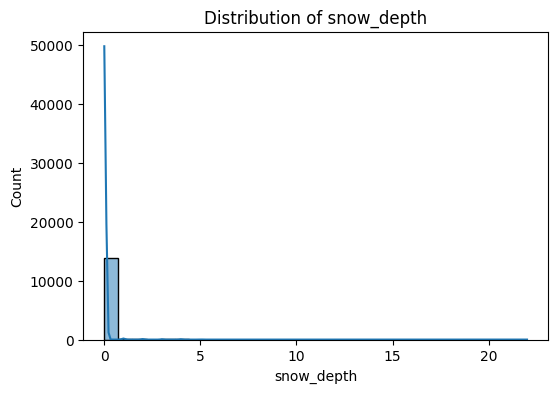

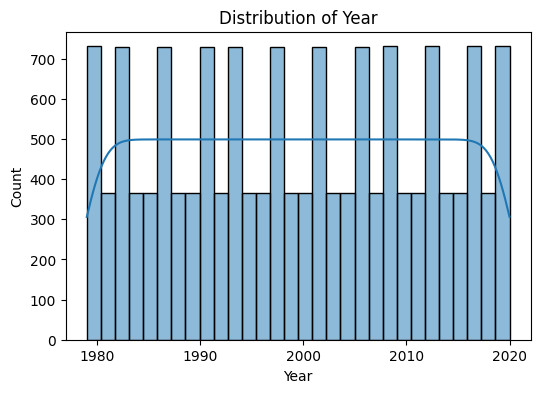

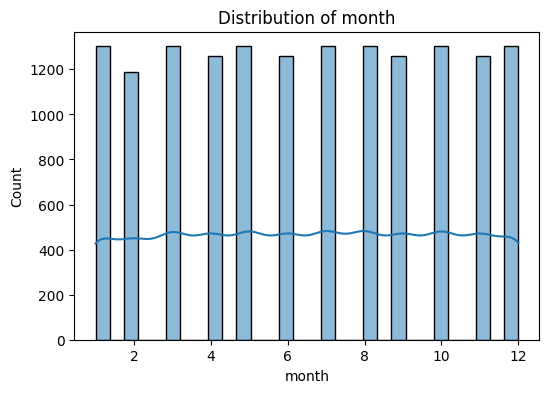

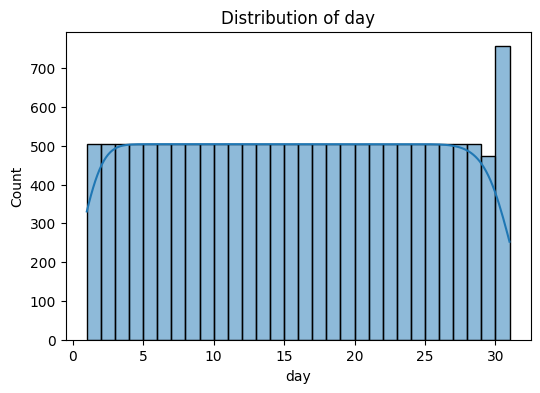

In [12]:
## plotting histogram of all columns

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [36]:
df['cloud_cover'].isna().sum()
df['cloud_cover'].head(10)

0    2.0
1    6.0
2    5.0
3    8.0
4    6.0
5    5.0
6    8.0
7    8.0
8    4.0
9    7.0
Name: cloud_cover, dtype: float64

In [13]:
# using different strategies to impute the null values

df['cloud_cover'] = df['cloud_cover'].fillna(df['cloud_cover']).mean()
df['global_radiation'] = df['global_radiation'].fillna(df['global_radiation']).median()
df['max_temp'] = df['max_temp'].ffill().bfill()
df['mean_temp'] = df['mean_temp'].interpolate(method = 'linear')
df['min_temp'] = df['min_temp'].fillna(df['min_temp'].median())
df['precipitation'] = df['precipitation'].fillna(0)
df['pressure'] = df['pressure'].ffill().bfill()
df['snow_depth'] = df['snow_depth'].fillna(0)

In [14]:
## now there are no null values

df.isnull().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
Year                0
month               0
day                 0
month_name          0
dtype: int64

In [22]:
## plotting box plot of month and maximum temperature 

fig = px.box(df, x = 'month_name', y = 'max_temp')
fig.show()

#### The above graph shows that the maximum temperature is high in July month and in August. So these months are perfect time to visit London

In [37]:
## box plot showing cloud cover across months

fig = px.box(df, x='month_name', y='cloud_cover')
fig.update_layout(title='Cloud Cover Across Months', xaxis_title='Month', yaxis_title='cloud cover')
fig.show()

####                               The cloud cover is low during July and August and high in remaining months

In [21]:
## plotting the graph of snow depth across months

fig = px.bar(df, x='month_name', y='snow_depth',  color= 'month_name')
fig.update_layout(title='Snow Depth Across Months', xaxis_title='Month', yaxis_title='Snow Depth')
fig.show()

####         The Snow depth is high in December, January and February and low in remaining months

In [50]:
## bar plot displaying global radiation across months

import plotly.express as px

fig = px.bar(df, x='month_name', y='global_radiation',
             color='month_name',
             title='Global Radiation Across Months',
             labels={'month_name': 'Month', 'global_radiation': 'Global Radiation'},
             height=400, width=800)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


##### The above analysis shows that global radiation is high in July, June and May

# Conclusion

#### In conclusion, July is the best month to visit with higher temperatures, low snow depth, high global radiation and minimal cloud cover.  